# Tweets from the android device

In [63]:
vis_data = gensimvis.prepare(lda, android_term_matrix, dictionary)
pyLDAvis.display(vis_data)

# Tweets from the iPhone device

In [54]:
vis_data = gensimvis.prepare(lda, iphone_term_matrix, dictionary)
pyLDAvis.display(vis_data)

# All tweets

In [73]:
vis_data = gensimvis.prepare(lda, term_matrix, dictionary)
pyLDAvis.display(vis_data)

# Code to see how the sausage was made

In [1]:
#!/usr/bin/env python3
#-*-coding: utf-8 -*-
%matplotlib inline

In [2]:
#pull in modules
import tweepy
from bs4 import BeautifulSoup
import re
from nltk.stem.wordnet import WordNetLemmatizer
import string
from nltk.corpus import stopwords
stop = stopwords.words('english')
import pandas as pd
import matplotlib.pyplot as plt
import gensim
from gensim import corpora
from gensim import models
import pyLDAvis.gensim as gensimvis
import pyLDAvis
plt.style.use('ggplot')

In [3]:
# You'll need to create a twitter app first
print('https://apps.twitter.com/')

https://apps.twitter.com/


In [4]:
# fill in the blanks with your dev info
access_token = ' '
access_token_secret = ' '
consumer_key = ' '
consumer_secret = ' '

In [5]:
# glance inside tweepy for a quick reference
print(dir(tweepy))

['API', 'AppAuthHandler', 'Cache', 'Category', 'Cursor', 'DirectMessage', 'FileCache', 'Friendship', 'MemoryCache', 'ModelFactory', 'OAuthHandler', 'RateLimitError', 'SavedSearch', 'SearchResults', 'Status', 'Stream', 'StreamListener', 'TweepError', 'User', '__author__', '__builtins__', '__cached__', '__doc__', '__file__', '__license__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'api', 'auth', 'binder', 'cache', 'cursor', 'debug', 'error', 'models', 'parsers', 'streaming', 'utils']


In [6]:
#tweepy getting started documentation
print('http://docs.tweepy.org/en/v3.5.0/getting_started.html')

http://docs.tweepy.org/en/v3.5.0/getting_started.html


In [7]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [8]:
api = tweepy.API(auth)

In [9]:
#tweepy documentation
print('http://docs.tweepy.org/en/v3.5.0/api.html#API.user_timeline')

http://docs.tweepy.org/en/v3.5.0/api.html#API.user_timeline


In [10]:
total_tweets = []
latest_tweets = api.user_timeline(screen_name = 'realDonaldTrump',
                               count=200)
total_tweets.extend(latest_tweets)
last = total_tweets[-1].id - 1
while len(latest_tweets) > 0:
    latest_tweets = api.user_timeline(screen_name = 'realDonaldTrump',
                                       max_id=last, count=200)
    total_tweets.extend(latest_tweets)
    last = total_tweets[-1].id - 1

In [11]:
# use the Twitter developer documentation field guide to select fields
print('https://dev.twitter.com/overview/api/tweets')

https://dev.twitter.com/overview/api/tweets


In [12]:
data = [[tweet.id_str, tweet.created_at, tweet.favorite_count, tweet.retweet_count,
         tweet.source, tweet.text.encode("utf-8")] for tweet in total_tweets]

In [13]:
# name the columns after the fields above
columns = ['id_str','created_at','favorite_count','retweet_count',
           'source','text']

In [14]:
# create a dataframe
df = pd.DataFrame(data=data, columns=columns)

In [15]:
# verify dataframe
df.head()

,id_str,created_at,favorite_count,retweet_count,source,text
0,858148882756325379,2017-04-29 02:40:11,45587,9822,Twitter for iPhone,"b'.@LouDobbs just stated that ""President Trump..."
1,858147464846729217,2017-04-29 02:34:33,0,4030,Twitter for iPhone,"b""RT @foxnation: . @TuckerCarlson : #Dems Don'..."
2,858100088253669376,2017-04-28 23:26:18,64170,19212,Twitter for iPhone,b'North Korea disrespected the wishes of China...
3,858086278037950464,2017-04-28 22:31:25,26020,4400,Twitter for iPhone,b'I will be interviewed by @MarthaMaccallum on...
4,857931397562085376,2017-04-28 12:15:59,68743,13921,Twitter for iPhone,b'We are making tremendous progress with the V...


In [16]:
df.tail()

,id_str,created_at,favorite_count,retweet_count,source,text
3242,721140843525050369,2016-04-16 00:59:09,6091,2191,Twitter for iPhone,b'Join me this weekend! #NYPrimary\n4/16: SYRA...
3243,721093904527925249,2016-04-15 21:52:38,10729,3677,Twitter for iPhone,"b'Thank you, @NYPost! #Trump2016\nhttps://t.co..."
3244,721083678387003396,2016-04-15 21:12:00,14860,5476,Twitter for iPhone,b'Thank you America! #Trump2016 https://t.co/P...
3245,720821603064524800,2016-04-15 03:50:37,12081,5207,Twitter for iPhone,b'MAKE AMERICA GREAT AGAIN!\nhttps://t.co/VxVO...
3246,720671808861696003,2016-04-14 17:55:23,8595,3481,Twitter for iPhone,"b'Join me on Saturday- in Syracuse, New York! ..."


In [17]:
# verify entries and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3247 entries, 0 to 3246
Data columns (total 6 columns):
id_str            3247 non-null object
created_at        3247 non-null datetime64[ns]
favorite_count    3247 non-null int64
retweet_count     3247 non-null int64
source            3247 non-null object
text              3247 non-null object
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 152.3+ KB


Twitter for iPhone     1627
Twitter for Android    1330
Twitter Web Client      250
Twitter for iPad         22
Twitter Ads              13
Media Studio              2
Instagram                 2
Periscope                 1
Name: source, dtype: int64


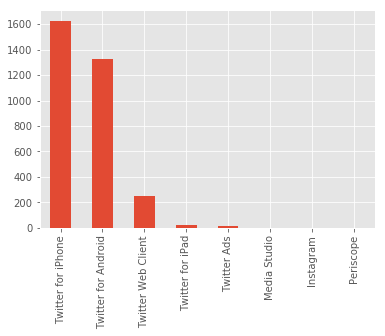

In [18]:
df['source'].value_counts().plot(kind='bar')
print(df['source'].value_counts())

In [19]:
df.describe()

,favorite_count,retweet_count
count,3247.000000,3247.00000
mean,39559.145981,11884.33939
std,42604.411146,12380.54555
min,0.000000,899.00000
25%,14811.000000,5442.00000
50%,24852.000000,8874.00000
75%,49227.500000,14665.50000
max,629786.000000,341877.00000


In [20]:
df.loc[df['id_str'] == '796315640307060738']

,id_str,created_at,favorite_count,retweet_count,source,text
870,796315640307060738,2016-11-09 11:36:58,629786,218721,Twitter for Android,b'Such a beautiful and important evening! The ...


In [77]:
top_tweet = df['text'].loc[df['favorite_count'] == 629786]
pd.set_option('display.max_colwidth', -1)
print(top_tweet)

870    b'Such a beautiful and important evening! The forgotten man and woman will never be forgotten again. We will all come together as never before'
Name: text, dtype: object


In [22]:
# create a new dataframe for tweets after inauguration
potus = df.loc[df['created_at'] > '2017-01-19']

In [23]:
potus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 0 to 510
Data columns (total 6 columns):
id_str            511 non-null object
created_at        511 non-null datetime64[ns]
favorite_count    511 non-null int64
retweet_count     511 non-null int64
source            511 non-null object
text              511 non-null object
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 27.9+ KB


Twitter for iPhone     326
Twitter for Android    171
Twitter Ads            12 
Media Studio           1  
Twitter Web Client     1  
Name: source, dtype: int64


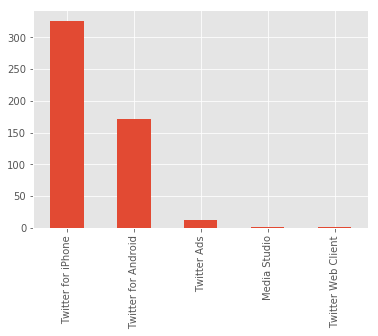

In [24]:
potus['source'].value_counts().plot(kind='bar')
print(potus['source'].value_counts())

In [25]:
# It looks like the web client was used once. Which tweet?
potus.loc[df['source'] == 'Twitter Web Client']

,id_str,created_at,favorite_count,retweet_count,source,text
469,824407390674157568,2017-01-26 00:03:33,110910,23331,Twitter Web Client,"b'Beginning today, the United States of America gets back control of its borders. Full speech from today @DHSgov:\xe2\x80\xa6 https://t.co/8aDaHsAhg9'"


## Several outlets reported the discontinuation of the android phone
http://money.cnn.com/2017/03/29/technology/trump-iphone-android-twitter/

In [26]:
# split the android tweets into a new dataframe
android_potus = potus.loc[df['source'] == 'Twitter for Android']

In [27]:
# split the iphone tweets into a new dataframe
iphone_potus = potus.loc[df['source'] == 'Twitter for iPhone']

In [28]:
# we see March 25 as the last android tweet
android_potus.head()

,id_str,created_at,favorite_count,retweet_count,source,text
175,845646761704243200,2017-03-25 14:41:14,51813,10200,Twitter for Android,b'Watch @JudgeJeanine on @FoxNews tonight at 9:00 P.M.'
176,845645916732358656,2017-03-25 14:37:52,105429,22723,Twitter for Android,b'ObamaCare will explode and we will all get together and piece together a great healthcare plan for THE PEOPLE. Do not worry!'
245,839448469374894080,2017-03-08 12:11:25,85795,15927,Twitter for Android,b'LinkedIn Workforce Report: January and February were the strongest consecutive months for hiring since August and September 2015'
249,839116941956640768,2017-03-07 14:14:03,123310,26275,Twitter for Android,"b""Don't let the FAKE NEWS tell you that there is big infighting in the Trump Admin. We are getting along great, and getting major things done!"""
250,839110000870109184,2017-03-07 13:46:28,125654,23987,Twitter for Android,b'I am working on a new system where there will be competition in the Drug Industry. Pricing for the American people will come way down!'


In [29]:
# since we split the dataframe into two, we need to reset index of both new dataframes
android_potus = android_potus.reset_index(drop=True)

In [30]:
android_potus.head()

,id_str,created_at,favorite_count,retweet_count,source,text
0,845646761704243200,2017-03-25 14:41:14,51813,10200,Twitter for Android,b'Watch @JudgeJeanine on @FoxNews tonight at 9:00 P.M.'
1,845645916732358656,2017-03-25 14:37:52,105429,22723,Twitter for Android,b'ObamaCare will explode and we will all get together and piece together a great healthcare plan for THE PEOPLE. Do not worry!'
2,839448469374894080,2017-03-08 12:11:25,85795,15927,Twitter for Android,b'LinkedIn Workforce Report: January and February were the strongest consecutive months for hiring since August and September 2015'
3,839116941956640768,2017-03-07 14:14:03,123310,26275,Twitter for Android,"b""Don't let the FAKE NEWS tell you that there is big infighting in the Trump Admin. We are getting along great, and getting major things done!"""
4,839110000870109184,2017-03-07 13:46:28,125654,23987,Twitter for Android,b'I am working on a new system where there will be competition in the Drug Industry. Pricing for the American people will come way down!'


In [31]:
iphone_potus = iphone_potus.reset_index(drop=True)

In [32]:
android_potus.describe()

,favorite_count,retweet_count
count,171.000000,171.000000
mean,131072.824561,27873.602339
std,50136.451732,14092.076428
min,45348.000000,6523.000000
25%,98485.000000,17681.000000
50%,121528.000000,24682.000000
75%,155055.000000,33699.000000
max,393761.000000,82405.000000


In [33]:
# above we see the most favorited tweet and the most retweeted
android_potus.loc[android_potus['favorite_count'] == 393761]

,id_str,created_at,favorite_count,retweet_count,source,text
161,823174199036542980,2017-01-22 14:23:17,393761,82405,Twitter for Android,"b""Peaceful protests are a hallmark of our democracy. Even if I don't always agree, I recognize the rights of people to express their views."""


In [74]:
# ... and the most retweeted (same as above)
android_potus.loc[android_potus['retweet_count'] == 82405]

,id_str,created_at,favorite_count,retweet_count,source,text
161,823174199036542980,2017-01-22 14:23:17,393761,82405,Twitter for Android,"b""Peaceful protests are a hallmark of our democracy. Even if I don't always agree, I recognize the rights of people to express their views."""


In [35]:
iphone_potus.describe()

,favorite_count,retweet_count
count,326.000000,326.000000
mean,73385.147239,16403.466258
std,40409.940040,9108.174453
min,0.000000,3451.000000
25%,53579.000000,10655.250000
50%,68802.000000,14546.500000
75%,90503.000000,19338.750000
max,292221.000000,61140.000000


In [75]:
# Let's see the most favorited iphone tweet...
iphone_potus.loc[iphone_potus['favorite_count'] == 292221]

,id_str,created_at,favorite_count,retweet_count,source,text
309,822669114237943808,2017-01-21 04:56:15,292221,52935,Twitter for iPhone,"b'THANK YOU for another wonderful evening in Washington, D.C. TOGETHER, we will MAKE AMERICA GREAT AGAIN\xf0\x9f\x87\xba\xf0\x9f\x87\xb8 https://t.co/V3aoj9RUh4'"


In [76]:
# ... and the most retweeted iphone tweet
iphone_potus.loc[iphone_potus['retweet_count'] == 61140]

,id_str,created_at,favorite_count,retweet_count,source,text
316,822502270503972872,2017-01-20 17:53:17,220272,61140,Twitter for iPhone,"b'January 20th 2017, will be remembered as the day the people became the rulers of this nation again.'"


In [38]:
print(iphone_potus["text"][0])

b'.@LouDobbs just stated that "President Trump\'s successes are unmatched in recent presidential history"  Thank you Lou!'


In [39]:
def review_to_words( raw_review ):
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text() 
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    # 3. Split into individual words
    words = letters_only.split()                             
    # 4. Convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    # 6. Join words into a string sep w by space, and return result.
    return( " ".join( meaningful_words )) 

In [40]:
clean_review = review_to_words( iphone_potus["text"][0] )
print(clean_review)

/anaconda/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)


LouDobbs stated President Trump successes unmatched recent presidential history Thank Lou


In [41]:
# Get the number of reviews based on the dataframe column size
num_tweets = iphone_potus["text"].size

In [42]:
num_tweets

326

In [43]:
# Initialize an empty list to hold the clean reviews

print ("Cleaning and parsing the iphone potus tweets...\n")
clean_iphone_potus = []
for i in range( 0, num_tweets ):
    # If the index is evenly divisible by 10, print a message
    if( (i+1)%10 == 0 ):
        print ("Review %d of %d\n" % ( i+1, num_tweets ) )     
    clean_iphone_potus.append( review_to_words( iphone_potus["text"][i] ))

Cleaning and parsing the iphone potus tweets...

Review 10 of 326

Review 20 of 326


/anaconda/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.fee


Review 30 of 326

Review 40 of 326

Review 50 of 326



/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anac

Review 60 of 326

Review 70 of 326

Review 80 of 326

Review 90 of 326

Review 100 of 326

Review 110 of 326



/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anac

Review 120 of 326

Review 130 of 326

Review 140 of 326

Review 150 of 326



/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anac

Review 160 of 326

Review 170 of 326

Review 180 of 326



/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anac

Review 190 of 326

Review 200 of 326

Review 210 of 326



/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anac

Review 220 of 326

Review 230 of 326

Review 240 of 326



/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anac

Review 250 of 326

Review 260 of 326

Review 270 of 326



/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anac

Review 280 of 326

Review 290 of 326

Review 300 of 326

Review 310 of 326

Review 320 of 326



/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anac

In [44]:
print(clean_iphone_potus)

['LouDobbs stated President Trump successes unmatched recent presidential history Thank Lou', 'RT foxnation TuckerCarlson Dems Don Really Believe Trump Is Pawn Russia That Just Their Political Tool https co K', 'North Korea disrespected wishes China highly respected President launched though unsuccessfully missile today Bad', 'I interviewed MarthaMaccallum FoxNews tonight pm Enjoy', 'We making tremendous progress V A There never much done quickly started We love VETS', 'RT foxandfriends Former President Obama K Wall Street speech stuns liberal base Sen Warren saying troubled http', 'Presidential Memorandum CommerceGov SecretaryRoss Aluminum Imports Threats National Security https co GnKoVz GTO', 'FLOTUS Melania I honored welcome Argentina President MauricioMacri First Lady Juliana Awada https co gR EPznu H', 'As families prepare summer vacations National Parks Democrats threaten close shut government Terrible', 'Democrats used support border security want illegals pour borders', 'Democ

In [45]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
from bs4 import BeautifulSoup
import re
stop = stopwords.words('english')

In [46]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()

In [47]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [48]:
doc_clean_iphone = [clean(doc).split() for doc in clean_iphone_potus] 

In [49]:
# Creating the term dictionary of our corpus,
# where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean_iphone)

In [50]:
iphone_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean_iphone]

In [51]:
lda = models.ldamodel.LdaModel(corpus=iphone_term_matrix, id2word=dictionary, num_topics=50, passes=10)

In [52]:
lda.save('iphone_lda.model')

In [54]:
vis_data = gensimvis.prepare(lda, iphone_term_matrix, dictionary)
pyLDAvis.display(vis_data)

### Let's do it again for the android device

In [55]:
# Get the number of reviews based on the dataframe column size
num_tweets = android_potus["text"].size

In [56]:
num_tweets

171

In [57]:
# Initialize an empty list to hold the clean reviews

print ("Cleaning and parsing the iphone potus tweets...\n")
clean_android_potus = []
for i in range( 0, num_tweets ):
    # If the index is evenly divisible by 10, print a message
    if( (i+1)%10 == 0 ):
        print ("Review %d of %d\n" % ( i+1, num_tweets ) )     
    clean_android_potus.append( review_to_words( android_potus["text"][i] ))

Cleaning and parsing the iphone potus tweets...

Review 10 of 171

Review 20 of 171

Review 30 of 171



/anaconda/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.fee

Review 40 of 171

Review 50 of 171

Review 60 of 171

Review 70 of 171

Review 80 of 171

Review 90 of 171

Review 100 of 171



/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anac

Review 110 of 171

Review 120 of 171

Review 130 of 171

Review 140 of 171

Review 150 of 171

Review 160 of 171

Review 170 of 171



/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anac

In [58]:
doc_clean_android = [clean(doc).split() for doc in clean_android_potus] 

In [59]:
dictionary = corpora.Dictionary(doc_clean_android)

In [60]:
android_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean_android]

In [61]:
lda = models.ldamodel.LdaModel(corpus=android_term_matrix, id2word=dictionary, num_topics=50, passes=10)

In [62]:
lda.save('android_lda.model')

In [63]:
vis_data = gensimvis.prepare(lda, android_term_matrix, dictionary)
pyLDAvis.display(vis_data)

### Now that we see how the android tweets were different from iphone tweets,
### let's look at the full account

In [65]:
num_tweets = potus["text"].size

In [66]:
num_tweets

511

In [67]:
print ("Cleaning and parsing the potus tweets...\n")
clean_potus = []
for i in range( 0, num_tweets ):
    # If the index is evenly divisible by 10, print a message
    if( (i+1)%10 == 0 ):
        print ("Review %d of %d\n" % ( i+1, num_tweets ) )     
    clean_potus.append( review_to_words( potus["text"][i] ))

Cleaning and parsing the potus tweets...



/anaconda/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.fee

Review 10 of 511

Review 20 of 511

Review 30 of 511

Review 40 of 511

Review 50 of 511



/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anac

Review 60 of 511

Review 70 of 511

Review 80 of 511

Review 90 of 511

Review 100 of 511



/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anac

Review 110 of 511

Review 120 of 511

Review 130 of 511



/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anac

Review 140 of 511

Review 150 of 511



/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anac

Review 160 of 511

Review 170 of 511

Review 180 of 511



/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anac

Review 190 of 511

Review 200 of 511

Review 210 of 511



/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anac

Review 220 of 511

Review 230 of 511

Review 240 of 511

Review 250 of 511



/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anac

Review 260 of 511

Review 270 of 511

Review 280 of 511

Review 290 of 511

Review 300 of 511

Review 310 of 511



/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anac

Review 320 of 511

Review 330 of 511

Review 340 of 511



/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anac

Review 350 of 511

Review 360 of 511

Review 370 of 511

Review 380 of 511



/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anac

Review 390 of 511

Review 400 of 511

Review 410 of 511

Review 420 of 511

Review 430 of 511

Review 440 of 511



/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anac

Review 450 of 511

Review 460 of 511

Review 470 of 511

Review 480 of 511



/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anac

Review 490 of 511

Review 500 of 511

Review 510 of 511



/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anaconda/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/anac

In [68]:
doc_clean = [clean(doc).split() for doc in clean_potus] 

In [69]:
dictionary = corpora.Dictionary(doc_clean)

In [70]:
term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [71]:
lda = models.ldamodel.LdaModel(corpus=term_matrix, id2word=dictionary, num_topics=50, passes=10)

In [72]:
lda.save('potus_lda.model')

In [73]:
vis_data = gensimvis.prepare(lda, term_matrix, dictionary)
pyLDAvis.display(vis_data)